# RandomForest 및 Bagging 설명
※ 앙상블(ensemble)은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

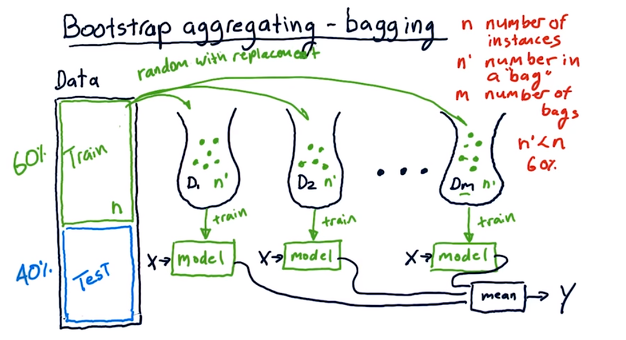

> - Ensemble기법 중 하나로 여러 개의 Decision tree model로 이뤄져 있으며, bagging 기반의 모델 
> - bagging 기반 모델의 일반화 성능이 좋게 나오기 위해서는 각각의 약분류기(weak classifier)의 성능은 좋고, 성격이 달라야함
> - 랜덤포레스트는 각각의 부트스트랩을 생성할 때, feature에 대해서도 random selection하는 것이 특징
> - 의사결정 나무와 비교해 이상치와 잡음(Outlier and noise)에 대해 상대적으로 강하며, tree의 수가 많아져도 과적합(overfitting) 문제에 덜 민감함

Breiman, L., “Random
Forests”, Machine Learning, Vol 45, No 1, 2001, pp 5-32과 Liaw, Andy and
Wiener, Matthew "Classification and Regression by randomForest," R News Vol 2,
No 3, 2002, pp. 18-22

In [1]:
import os
os.chdir(r'C:/Users/User/Desktop')
os.getcwd()

'C:\\Users\\User\\Desktop'

In [2]:
from IPython.display import Image

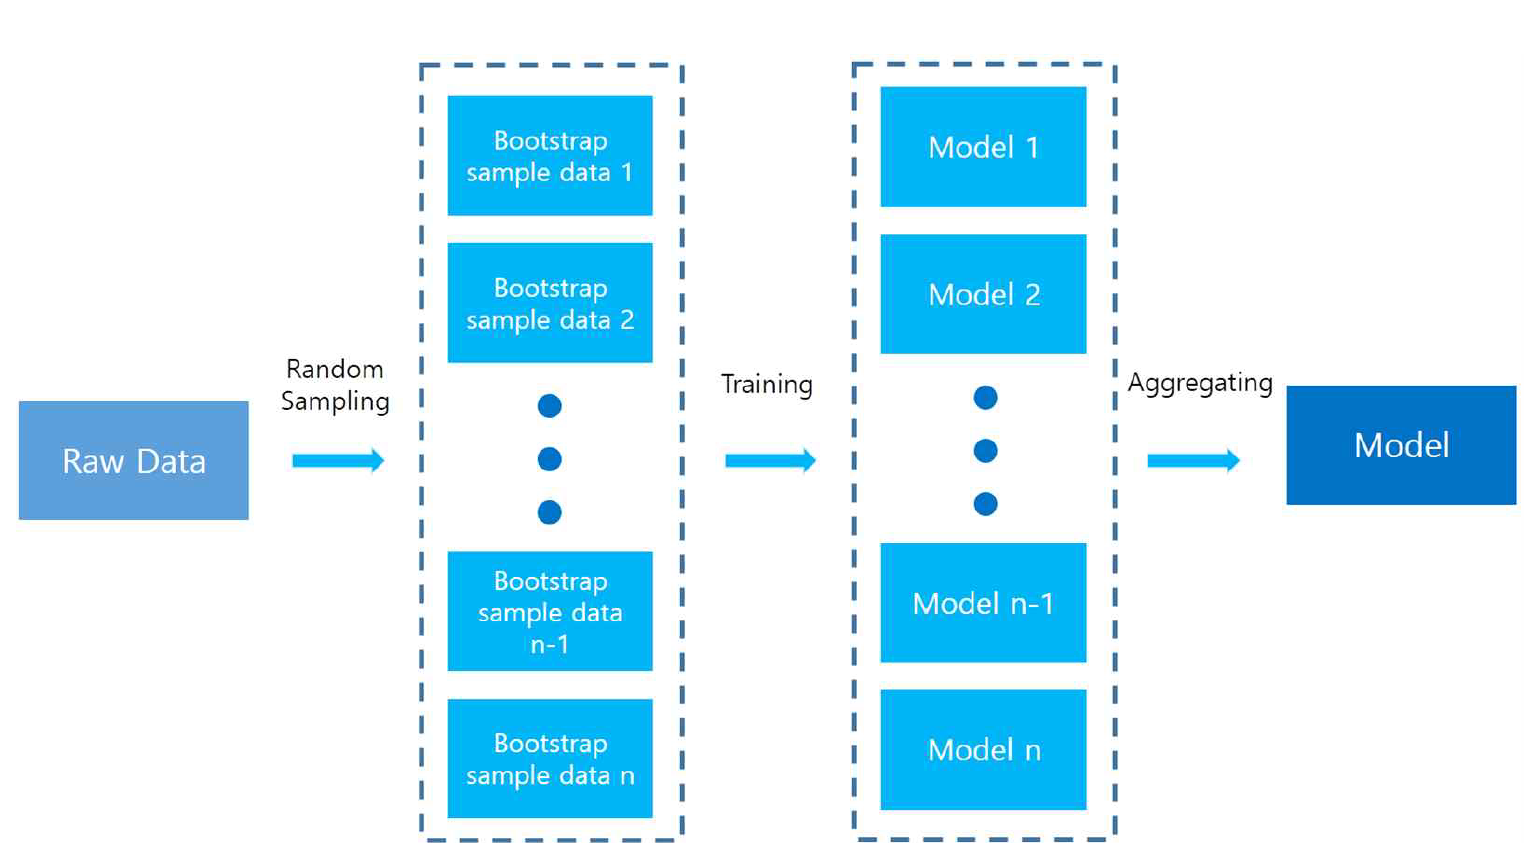

In [3]:
Image("img/bagging.png",  width=800, height=800)

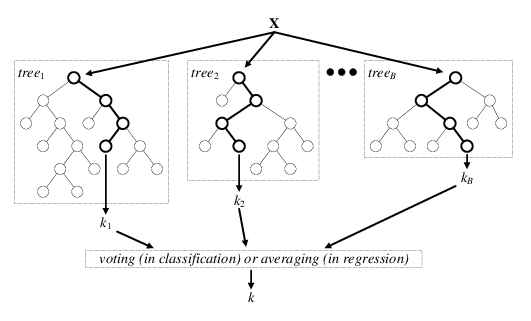

In [4]:
Image("img/RF.png",  width=800, height=800)

In [5]:
# Basic tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Data split
from sklearn.model_selection import train_test_split  

## 1. classification 

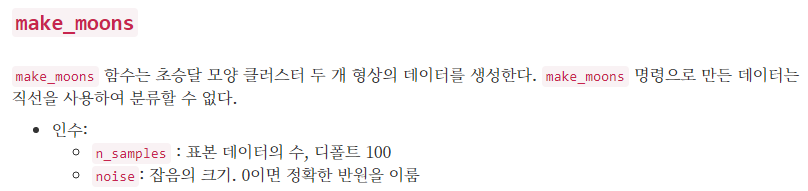

In [7]:
Image("img/make_moons.png",  width=500, height=500)

(200, 2)


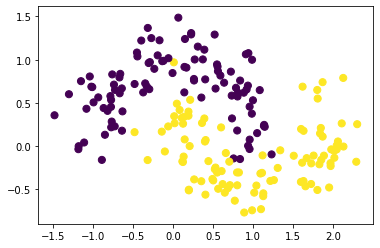

In [10]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.2, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y, s=50)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# binary class
y

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

### Decision tree vs Randomforest

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=42)

dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, \
                            criterion='gini', max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
print(dt_gini.score(X_test,y_test))
print(rfc.score(X_test,y_test))

0.9
0.95


### 여러가지 기능

In [15]:
#1. estimators_: Randomforest에 포함된 Decision tree
print(rfc.estimators_[:3])
print(len(rfc.estimators_))

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1273642419, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', m

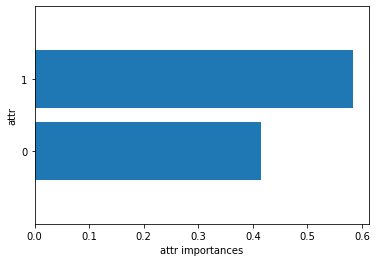

In [16]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것

def plot_feature_importances(model):

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features))

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plot_feature_importances(rfc)
plt.show()

In [17]:
# 3. oob_score -> test data로 성능 평가와 비슷
## train data 중 포함되지 않은 data로 성능측정
rfc.oob_score_

0.9375

In [18]:
rfc.predict_proba(X_test)

array([[0.99807692, 0.00192308],
       [0.99      , 0.01      ],
       [0.99182692, 0.00817308],
       [0.89      , 0.11      ],
       [0.99      , 0.01      ],
       [0.10147059, 0.89852941],
       [0.0547444 , 0.9452556 ],
       [0.94532297, 0.05467703],
       [0.        , 1.        ],
       [0.99432692, 0.00567308],
       [0.94555556, 0.05444444],
       [0.99736842, 0.00263158],
       [0.51932773, 0.48067227],
       [0.62399027, 0.37600973],
       [0.60484636, 0.39515364],
       [0.01086957, 0.98913043],
       [0.99432692, 0.00567308],
       [0.05      , 0.95      ],
       [0.00147059, 0.99852941],
       [0.28827598, 0.71172402],
       [0.00147059, 0.99852941],
       [0.99      , 0.01      ],
       [0.04545455, 0.95454545],
       [0.99807692, 0.00192308],
       [0.12624947, 0.87375053],
       [0.35997671, 0.64002329],
       [0.        , 1.        ],
       [0.94532297, 0.05467703],
       [0.        , 1.        ],
       [0.20631695, 0.79368305],
       [0.

In [19]:
rfc.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

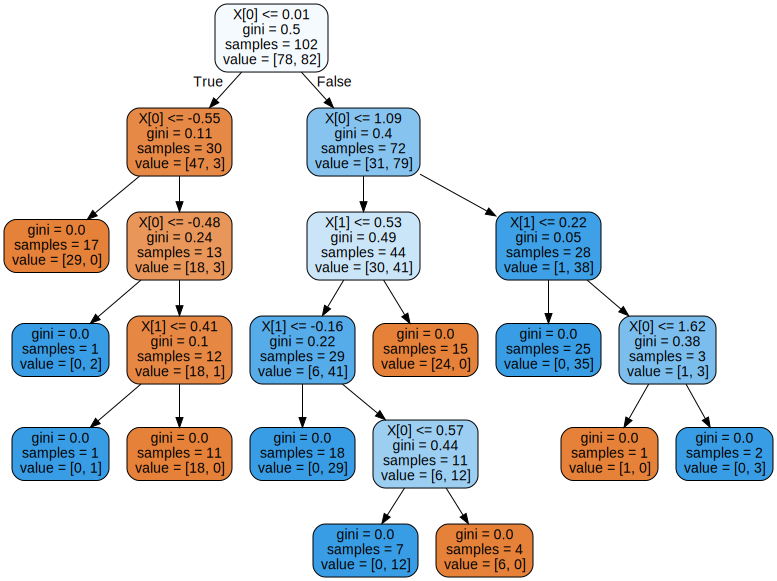

In [22]:
# randomforest 중 일부 트리 graph화
estimator = rfc.estimators_[15]

import graphviz
from sklearn.tree import export_graphviz

# Export as dot file
dot_data = export_graphviz(estimator, 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [ ]:
#!pip install mglearn

C:\Users\User\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


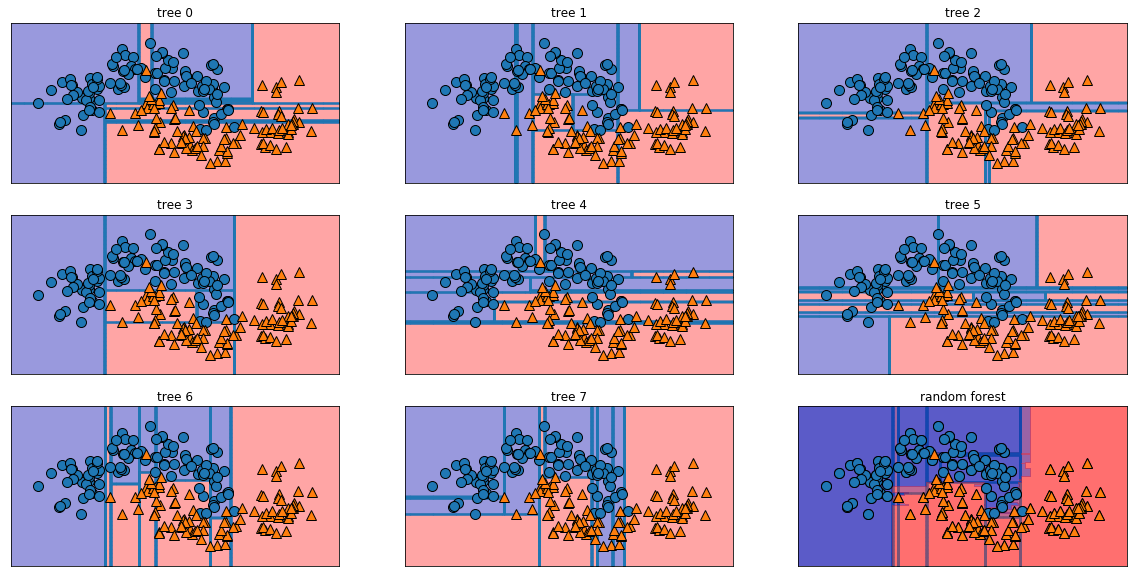

In [23]:
import mglearn

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), rfc.estimators_)):

    ax.set_title("tree {}".format(i))

    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(rfc, X, fill=True, ax=axes[-1, -1], alpha=.4)

axes[-1, -1].set_title("random forest")

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.show()

## 2. Regression

### Data 생성

In [24]:
from sklearn.datasets import load_boston as boston
bos = boston()
X = bos['data']
y = bos['target']
col_names = bos.feature_names

boston_x = pd.DataFrame(data=X, columns= col_names)
boston_x['MEDV'] = y
y = boston_x.MEDV.copy()
del boston_x['MEDV']
boston = pd.concat((boston_x,y), axis=1)

In [25]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Data scailing
> 데이터 스케일링을 해주는 이유는 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해버릴 수 있기 때문

* 장점: 다차원의 값들을 비교 및 분석하기 쉬움 , 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상
* 단점: 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없음.


In [27]:
# Feature Scaling # 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(X_train)

# test data는 transform으로 스케일링
X_test = sc.transform(X_test)

In [28]:
np.set_printoptions(suppress=True, precision=True)
X_train

array([[-0.4, -0.5, -0.7, ..., -0.5,  0.4, -0.4],
       [-0.4, -0.5, -0. , ...,  0.3,  0.2, -0.4],
       [-0.4,  0.8, -0.9, ..., -0.8,  0.4, -0.2],
       ...,
       [-0.4, -0.5, -0.2, ..., -0.3,  0.4, -0.3],
       [-0.4, -0.5, -0.6, ..., -0.3,  0.4,  0.8],
       [-0.4, -0.5, -1. , ..., -0.8,  0.4,  0.3]])

### Decision tree vs Randomforest

In [29]:
# Decision tree #
from sklearn.tree import DecisionTreeRegressor as dtr
dtr = dtr(criterion='mse', max_depth=5, random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [43]:
# random forest #
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators=80, oob_score=True, max_features=7, \
                                  criterion='mse', max_depth=5, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [31]:
print(f'Decision tree feature importances: {dtr.feature_importances_}')
print(f'Random forest feature importances: {rfr.feature_importances_}')

Decision tree feature importances: [0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.6]
Random forest feature importances: [0.1 0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.1 0.  0.4]


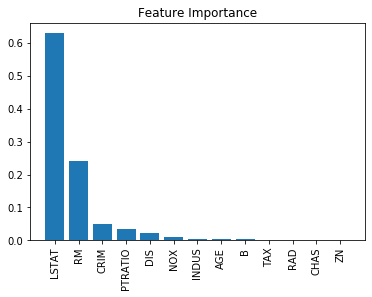

In [32]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
## Decision tree 기준 

def plot_feature_importances(model):
    importances = model.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [bos.feature_names[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(dtr)
plt.show()

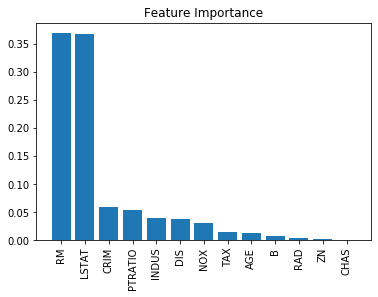

In [33]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
## randomforest 기준 
def plot_feature_importances(model):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [bos.feature_names[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(rfr)
plt.show()

In [34]:
# out of bag score
rfr.oob_score_

0.8821077410981781

In [44]:
# decision tree vs randomforest
print(dtr.score(X_test,y_test))
print(rfr.score(X_test,y_test))

0.5827780673992133
0.7247283565584919


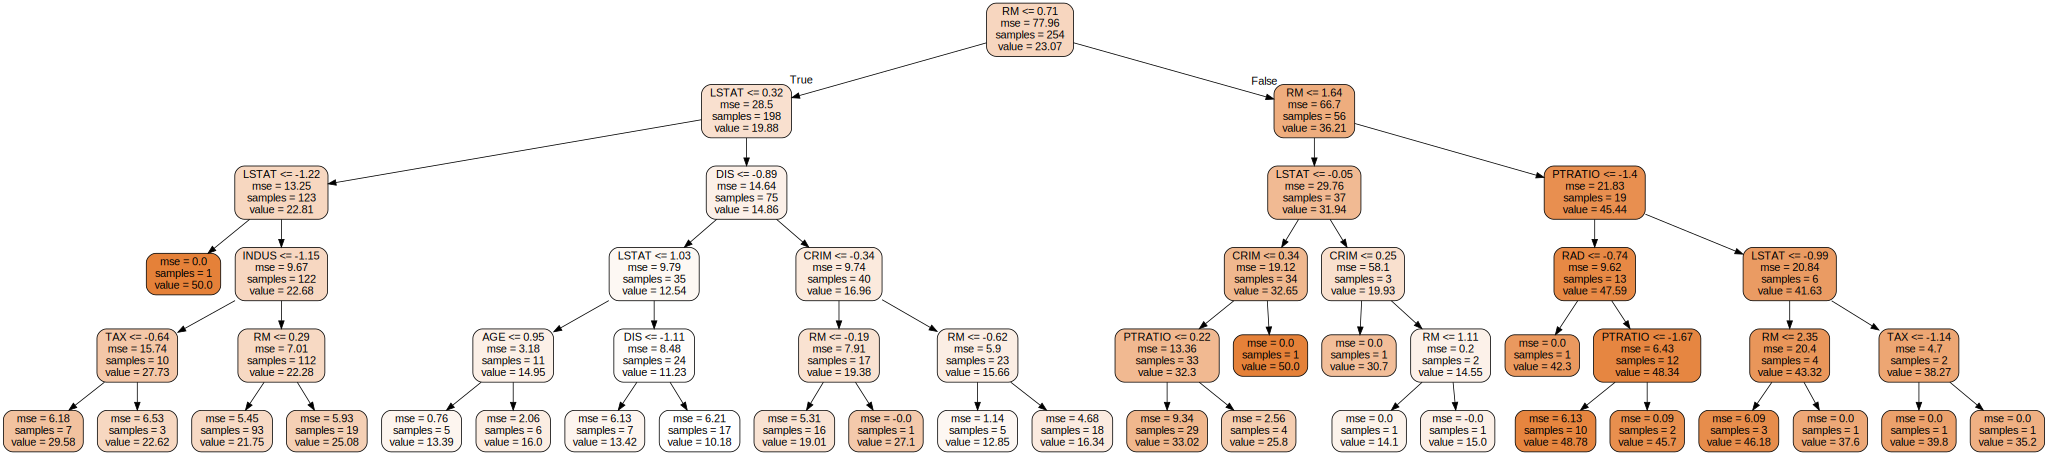

In [38]:
# randomforest 중 일부 트리 graph화
estimator = rfr.estimators_[50]

from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = bos.feature_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [39]:
n_nodes = []
max_depths = []

for ind_tree in rfr.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [40]:
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 54
Average maximum depth 5


In [41]:
# RandomForestRegressor 기준 #
from sklearn import metrics

y_pred = rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.9546249232234043
Mean Squared Error: 23.50660718945691
Root Mean Squared Error: 4.848361289080766


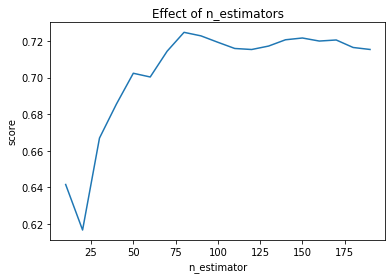

In [42]:
# random forest에 속한 decision tree별 성능변화
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rfr.set_params(n_estimators=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)